In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from spectral import *
from spectral import envi
import pandas as pd
import os
import pickle
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
# Read the spectral library and wavelengths
notebook_path = os.path.abspath("spectra_analysis.ipynb")
fname_spectral_library = os.path.join(os.path.dirname(notebook_path), "clean_ENVI_lib.hdr")
lib = envi.open(fname_spectral_library)
spectra = lib.spectra
names = lib.names
wl = lib.bands.centers
nSpectra = spectra.shape[0]
nBands = spectra.shape[1]
print("Number of Spectra: "+str(nSpectra))
print("Number of Library Bands: "+str(nBands))


Number of Spectra: 1275
Number of Library Bands: 181


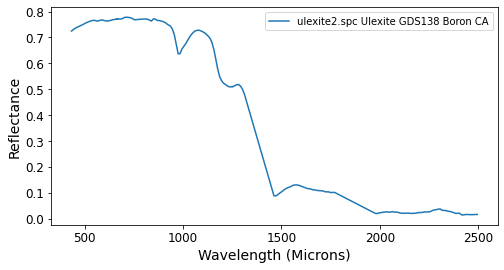

In [19]:
# Plot one spectrum
matplotlib.rcParams['figure.figsize'] = (8,4)
idx = 579
plt.plot(wl,spectra[idx,:], label=names[idx])
plt.xlabel('Wavelength (Microns)')
plt.ylabel('Reflectance')
plt.legend();

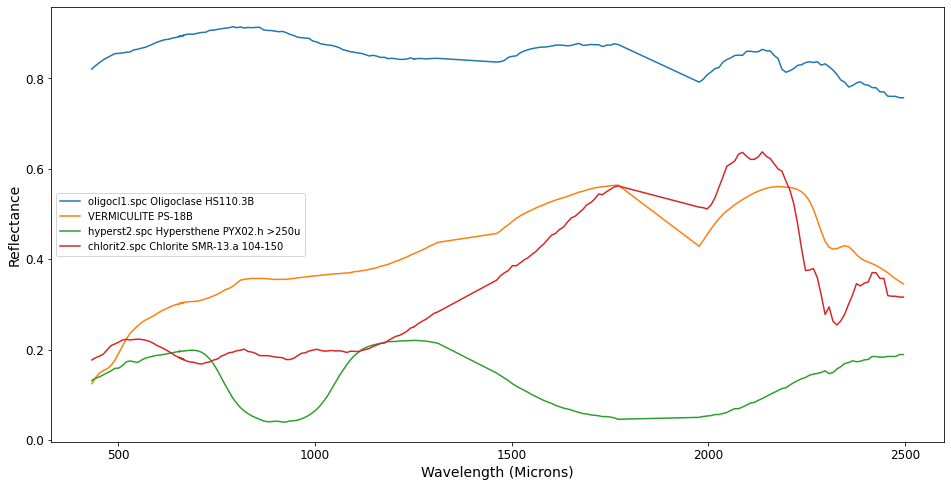

In [8]:
# Plot four spectra
matplotlib.rcParams['figure.figsize'] = (16,8)
indices = np.random.randint(nSpectra, size=4)
for idx in indices:
  plt.plot(wl,spectra[idx,:], label=names[idx])
  plt.xlabel('Wavelength (Microns)')
  plt.ylabel('Reflectance')
  plt.legend();

In [9]:
fname_spectral_library = os.path.join(os.path.dirname(notebook_path), "ROIs.csv")
df = pd.read_csv(fname_spectral_library)
df.head()

,Name,Color,Pixel_x,Pixel_y,433.671295,443.366211,453.065491,462.769196,472.477295,482.189789,...,2405.986084,2415.923096,2425.85791,2435.790039,2445.719971,2455.647949,2465.572998,2475.496094,2485.416992,2495.335938
0,area 1,#fa3232,191,103,1324.0000,1518.0001,1636.0000,1703.0001,1779.0000,1823.0000,...,2788.0,2764.9998,2637.0,2635.0000,2611.0,2494.0,2423.0,2534.0,2942.0000,2463.0
1,area 1,#fa3232,192,103,1339.0000,1460.0000,1597.0001,1676.0000,1722.0000,1797.0000,...,2748.0,2764.9998,2599.0,2536.0000,2572.0,2381.0,2390.0,2441.0,2804.0000,2594.0
2,area 1,#fa3232,191,104,1362.0000,1515.0000,1636.0000,1710.0000,1767.0000,1879.9999,...,2867.0,2886.0000,2750.0,2606.9998,2708.0,2550.0,2407.0,2581.0,2896.0002,2594.0
3,area 1,#fa3232,192,104,1327.0000,1483.0001,1617.0000,1679.0000,1734.0000,1808.9999,...,2709.0,2719.0000,2662.0,2664.0000,2669.0,2480.0,2440.0,2441.0,2850.0000,2496.0
4,area 1,#fa3232,193,104,1316.0001,1489.0000,1612.0000,1671.0000,1738.9999,1788.0000,...,2762.0,2780.0000,2637.0,2550.0000,2630.0,2466.0,2440.0,2511.0,2850.0000,2430.0


In [13]:
X = df.iloc[:,4:].to_numpy()/10000
nTestSpectra = X.shape[0]
print(nTestSpectra)

246


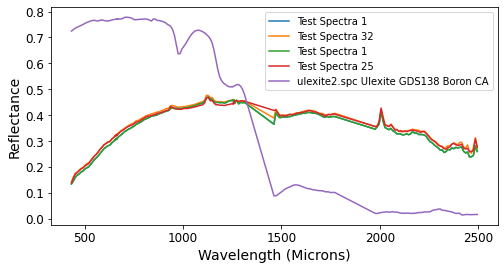

In [27]:
# Plot four spectra
indices = np.random.randint(nTestSpectra, size=4)
for idx in indices:
  plt.plot(wl,X[idx,:], label='Test Spectra '+str(idx))
  plt.xlabel('Wavelength (Microns)')
  plt.ylabel('Reflectance')
  plt.legend();

# Question: Which of the test spectra contain Boron?

In [18]:
index = 0
for name in names:
    if "oron" in name: 
        print(name)
        print(index)
    index = index + 1
    

ulexite2.spc Ulexite GDS138 Boron CA
579


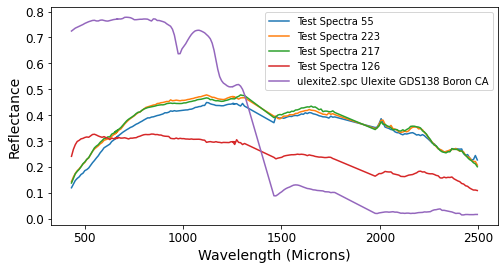

In [28]:
# Plot Boron and four spectra from the ROIs
indices = np.random.randint(nTestSpectra, size=4)
for idx in indices:
  plt.plot(wl,X[idx,:], label='Test Spectra '+str(idx))
  plt.xlabel('Wavelength (Microns)')
  plt.ylabel('Reflectance')
  plt.legend();
idx = 579
plt.plot(wl,spectra[idx,:], label=names[idx])
plt.xlabel('Wavelength (Microns)')
plt.ylabel('Reflectance')
plt.legend();

aspenlf2.spc Aspen_Leaf-B DW92-3


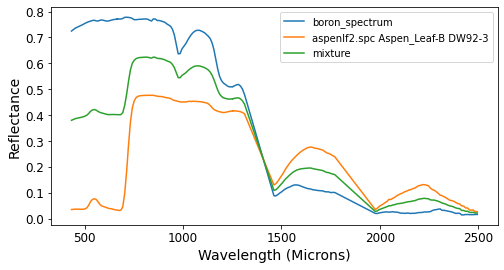

In [34]:
boron_spectrum = spectra[579,:]
other_spectrum = spectra[100,:]
print(names[100])
mixture = 0.5*boron_spectrum + 0.5*other_spectrum
plt.plot(wl,boron_spectrum, label='boron_spectrum')
plt.plot(wl,other_spectrum, label=names[100])
plt.plot(wl,mixture, label='mixture')
plt.xlabel('Wavelength (Microns)')
plt.ylabel('Reflectance')
plt.legend();


In [39]:
from sklearn.linear_model import LinearRegression

# Generate some random data
X = np.array([boron_spectrum,other_spectrum]).T
mixture = 0.1*boron_spectrum + 0.9*other_spectrum

# Create a LinearRegression model
model = LinearRegression()

# Train the model on the data
model.fit(X, mixture)

# Print the model coefficients and predictions
print("Model coefficients:", model.coef_)

Model coefficients: [0.09999999 0.90000004]


## FIX THIS!!?!


In [43]:
from sklearn.linear_model import LinearRegression

# Generate some random data
#X = np.array([boron_spectrum,other_spectrum]).T
mixture = 0.1*boron_spectrum + 0.9*other_spectrum

# Create a LinearRegression model
model = LinearRegression()

# Train the model on the data
model.fit(spectra.T, mixture)

# Print the model coefficients and predictions
print("Model coefficients:", model.coef_)
for idx in np.arange(nSpectra):
    print(names[idx]+': '+str(model.coef_[idx]))

Model coefficients: [ 0.03134175 -0.03260634  0.02045918 ... -0.00361075  0.00240778
  0.00082656]
Arroyo Willow: 0.031341746
Bay Laurel: -0.032606337
Blue Oak: 0.02045918
California Valley Oak: 0.038484097
C. Buckeye: -0.008217038
Chamise (Flower): -0.007709194
Chamise (Green): -0.0007047979
Coast Redwood (Dry): -0.011710232
Coast Redwood (Green): 0.0069395714
Coast Sage: -0.02394227
Common Buck Bush: 0.032128792
Coyote Bush 1: -0.0043477565
Coyote Bush 2: 0.027852226
Dove Weed: -0.011685815
Dry Grass: 7.226691e-05
Leather Oak: 0.017097808
Live Oak: 0.007929455
Madrone: 0.023936206
Red Willow: 0.06374755
Toyon: 0.021329876
Tarweed: -0.018892096
Jasper Ridge Butano Sandstone: -0.013056483
Jasper Ridge Grassland Soil: -0.014783315
Jasper Ridge Gravel: 0.008099737
Jasper Ridge Serpentine: -0.0033624163
CDE001:Spruce Cellulose: -0.0028184725
CDE002: Cotton Cellulose: -0.0058013806
CDE003: Wet Cotton Cellulose: -0.031388905
CDE004: Loblolly Pine Lignin: 0.010149035
CDE005: Sweetgum Lignin: